In [372]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [373]:
data = pd.read_csv('./Resources/behavioral_revised_data_final.csv')
data.head()

,State,State Code,Sex,Marital Status,Age,Race,Education,Weight(lbs),Height(ft),Income,...,Physical Activity/Day(mints),Smoking,Alcohol/Day,BMI,Blood Pressure,Cholestrol,Heart Disease,Stroke,Cancer,Diabetes
0,Alabama,AL,Female,Widowed,70-74,White only,High School,128.0,4.99980,20000-25000,...,30.0,Every day,2.0,Overweight,Yes,Yes,No,No,No,No
1,Alabama,AL,Male,Married,>80,White only,College 4yrs,172.0,5.83310,>75000,...,40.0,Not at all,1.0,Normal Weight,No,No,No,No,No,Yes
2,Alabama,AL,Male,Married,50-54,White only,College 3yrs,135.0,5.33312,35000-50000,...,308.0,Every day,1.0,Normal Weight,No,No,No,No,No,Yes
3,Alabama,AL,Male,Married,35-39,White only,College 3yrs,190.0,5.99976,15000-20000,...,20.0,Every day,1.0,Overweight,No,No,No,No,No,No
4,Alabama,AL,Male,Married,65-69,White only,College 4yrs,212.0,5.91643,Refused,...,150.0,Not at all,1.0,Overweight,Yes,Yes,Yes,Yes,No,No


In [374]:
data =data[data.Smoking != 'Refused']
data =data[data.Smoking != 'Don´t Know/Not Sure']


In [375]:
X = data[["Income"]]
y = data[["Weight(lbs)"]].values.reshape(-1, 1)
print(X.shape, y.shape)

(55673, 1) (55673, 1)


In [376]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,Income_ >75000,Income_10000-15000,Income_15000-20000,Income_20000-25000,Income_25000-35000,Income_35000-50000,Income_50000-75000,Income_< 10000,Income_Don’t know/Not sure,Income_Refused
0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [377]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Income_ >75000,Income_10000-15000,Income_15000-20000,Income_20000-25000,Income_25000-35000,Income_35000-50000,Income_50000-75000,Income_< 10000,Income_Don’t know/Not sure,Income_Refused
53448,1,0,0,0,0,0,0,0,0,0
4203,1,0,0,0,0,0,0,0,0,0
34185,0,0,0,0,1,0,0,0,0,0
3471,0,0,0,0,0,0,0,0,0,1
52405,1,0,0,0,0,0,0,0,0,0


In [378]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/azizkoyuncu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [379]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/azizkoyuncu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/Users/azizkoyuncu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  


In [380]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

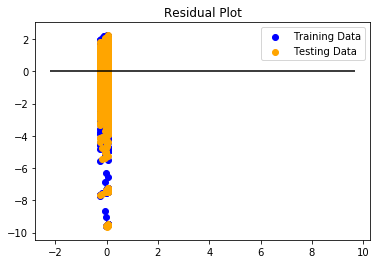

In [381]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [382]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0221613166126637, R2: 0.00531128479224896


In [383]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.022769412863687, R2: 0.004719532327327469


In [384]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.022155505225148, R2: 0.005316939987263458


In [385]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0222922679301332, R2: 0.005183853049713582
